## Mounting drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## Setup System


In [0]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import scipy.stats as st
import matplotlib.cm as cm
import random
import matplotlib.patches as patches
from matplotlib.collections import LineCollection
import matplotlib as mpl

In [12]:
workingDir=os.getcwd()

#workingDir=workingDir+"/drive/My Drive/"
workingDir=workingDir+"/drive/My Drive/SYNC_Projects/"

experimentDir=workingDir+"pHT/ms/data/Fig_2/"

print(experimentDir)

figuresDir=workingDir+"pHT/ms/figures/"

list_populations_names=["pBGT",
                        "HT-1505-1","HT-1505-2","HT-1505-3",
                        "HT-A25-1","HT-A25-2","HT-A25-3",
                        "HT-C12-1","HT-C12-2","HT-C12-3",
                        "HT-LB",
                        "pBRT"];
list_populations_files=os.listdir(experimentDir)
list_populations_files.sort()
list_populations_files


/content/drive/My Drive/SYNC_Projects/pHT/ms/data/Fig_2/


['G1.txt',
 'HT-0_chl-15_caz-05_rep-1.txt',
 'HT-0_chl-15_caz-05_rep-2.txt',
 'HT-0_chl-15_caz-05_rep-3.txt',
 'HT_1_A25_REP-1.txt',
 'HT_1_A25_REP-2.txt',
 'HT_1_A25_REP-3.txt',
 'HT_1_C125_REP-1.txt',
 'HT_1_C125_REP-2.txt',
 'HT_1_C125_REP-3.txt',
 'HT_1_LB.txt',
 'R12.txt']

## Loading auxiliary functions

In [0]:
def cart2pol(x, y):
    rho = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    return(phi, rho)

def plot_Raw_flourescence(data1,data2,title,name1,name2,lg,lr):
    fig,ax= plt.subplots( figsize=(10,5))
    
    xm=np.mean(data1)
    ym=np.mean(data2)
    
    ax.scatter(data1,data2,s=5,alpha=.1)
    ax.scatter(xm,ym,c='r')
    #ax.set_aspect('equal')
    ax.grid(True)
    ax.set_xlim(left=0)
    if(lg):
        ax.set_xlim(right=lg)
    ax.set_ylim(bottom=0)
    
    if(lr):
        ax.set_ylim(top=lr)
    
    ax.set_title(title, va='bottom')
    ax.set_xlabel(name1)
    ax.set_ylabel(name2)

    lregGFP=linregress(data1,data2)
    x_vals = np.array(ax.get_xlim())
    y_vals = lregGFP.intercept + lregGFP.slope * x_vals
    ax.plot(x_vals, y_vals, '--g')

    return plt

def plot_distributions_mix(ax,this_df,ref_df,lrange,prop):
    
    #cmap =cm.get_cmap('RdYlGn')   
    #if prop=="phis_N01":
    #    cmap =cm.get_cmap('RdYlGn_r')   
    
    colors=[(100,34,101),(92,204,192),(27,68,28)]
    cmap=make_cmap(colors, bit=True)
    
    ref_devs=ref_df[prop]
    ref_den=st.gaussian_kde(ref_devs)
    ref_ys=ref_den(lrange)
    maxr=np.max(ref_ys)
    ref_ys=[x/maxr for x in ref_ys]
    
    ax.plot(lrange,ref_ys,c='k')
    
    this_devs=this_df[prop]
    
    h,n=np.histogram(this_devs,lrange)
    maxh=np.max(h)
    h=[x/maxh for x in h]
    bin_size=n[1]-n[0]
    n=n[1:]-bin_size/2
   
    for ib, b in enumerate(n):
        ax.add_patch(
            patches.Rectangle(
                (b-bin_size/2, 0),   # (x,y)
                bin_size,          # width
                h[ib],          # height
                facecolor='silver'#cmap((ib+1)/len(n))
                )
            )
    
    
    ax.set_xlim([lrange[0],lrange[-1]])
    
    return ax


def plot_polar_fancy_cutoffs(ax,this_df,ref_df,alph,llim,name,angle_type,g1ct,r12ct):
    
    if(angle_type=="phis_N01"):
        rho_type="rhos_N01"
    elif(angle_type=="phis_01"):
        rho_type="rhos_01"
    ##poopulation data
    phis01=this_df[angle_type]
    rhos01=this_df[rho_type]
    #  meanPhi_Nrot,maxRho_N,meanRho_N  
    this_colors=cmap([1-x/np.pi for x in phis01])


    ax.scatter(phis01, rhos01,s=10,c=this_colors,alpha=alph)
    
    ax.plot([0,g1ct],[0,1],c=colors[2],alpha=.25)
    ax.plot([0,r12ct],[0,1],c=colors[0],alpha=.25)
    
    
    this_moments=st.describe(phis01)
    print(this_moments)
    hts=[]
    g1s=[]
    r12s=[]
    for p in phis01:
        if(p<g1ct):
            g1s.append(p)
        elif(p>r12ct):
            r12s.append(p)
        else:
            hts.append(p)
    print(len(g1s),len(hts),len(r12s))
    
    lphimean=np.mean(phis01)
    lrhomean=np.mean(rhos01)
    
    phisrmode=[round(p,1) for p in phis01]
    rhosrmode=[round(r,1) for r in rhos01]
    p=st.mode(phisrmode)
    r=st.mode(rhosrmode)
    lphimode=p.mode[0]
    lrhomode=r.mode[0]

    
    ####population metrics
    if(ref_df.empty):
    
        ax.scatter(lphimean,lrhomean,s=30,c='k',zorder=3)
        #ax.scatter(lphimode,lrhomode,s=30,c='b',zorder=3)

    if(not ref_df.empty):
        phis01=list(ref_df[angle_type])
        rhos01=list(ref_df[rho_type])
        refphimean=np.mean(phis01)
        refrhomean=np.mean(rhos01)
        #ax.scatter(refphimean,refrhomean,s=30,c='k',zorder=3)
        
        #ax.annotate("", xy=(lphimean, lrhomean), xytext=(refphimean,refrhomean),  arrowprops=dict(arrowstyle="->",color='k',lw=1))
        
        phisrmode=[round(p,1) for p in phis01]
        rhosrmode=[round(r,1) for r in rhos01]
        p=st.mode(phisrmode)
        r=st.mode(rhosrmode)
        refphimode=p.mode[0]
        refrhomode=r.mode[0]
        #ax.scatter(refphimode,refrhomode,s=30,c='b',zorder=3)
        
        #ax.annotate("", xy=(lphimode, lrhomode), xytext=(refphimode,refrhomode),  arrowprops=dict(arrowstyle="->",color='b',lw=1))
        
        
        
    ax.set_rmax(1)
    ax.set_rticks(ticks=[])
    ax.set_thetamin(-llim)
    ax.set_thetamax(180+llim)
    ax.grid(False)
    ax.set_thetagrids([0,90,180],labels=["G1","Plasmid Fraction","R12"])
    #ax.set_title("%s"%(pop), va='bottom')
    ax.set_title(name, va='bottom',fontweight='bold')
    ax.title.set_position([.5, .9])
    return ax,len(g1s),len(hts),len(r12s),this_moments

def get_relfit_logout(refnI,refnF,thisnI,thisnF):
    
    this_frac=thisnF/thisnI
    ref_frac=refnF/refnI
    #print("this frac %s\nref_frac %s"%(this_frac,ref_frac))
    fit_rel=np.log(this_frac/ref_frac)
    
    return fit_rel

def make_cmap(colors, position=None, bit=False):
  bit_rgb = np.linspace(0,1,256)
  if position == None:
    position = np.linspace(0,1,len(colors))
  else:
    if len(position) != len(colors):
      sys.exit("position length must be the same as colors")
    elif position[0] != 0 or position[-1] != 1:
      sys.exit("position must start with 0 and end with 1")

  if bit:
    for i in range(len(colors)):
      colors[i] = (bit_rgb[colors[i][0]], bit_rgb[colors[i][1]], bit_rgb[colors[i][2]])
    
  cdict = {'red':[], 'green':[], 'blue':[]}

  for pos, color in zip(position, colors):
    cdict['red'].append((pos, color[0], color[0]))
    cdict['green'].append((pos, color[1], color[1]))
    cdict['blue'].append((pos, color[2], color[2]))
    cmap = cm.colors.LinearSegmentedColormap('my_colormap',cdict,256)
  return cmap


colors=[(100,34,101),(92,204,192),(27,68,28)]
cmap=make_cmap(colors, bit=True)

def get_strain_counts_by_env(df,envs,angle_type,g1ct,r12ct):
    
    repsg=[]
    repsr=[]
    repsh=[]
    for this_env in envs:
        this_df=df[df["pop"].str.contains(this_env)]
        phis01=this_df[angle_type]
    
    
        hts=[]
        g1s=[]
        r12s=[]
        for p in phis01:
            if(p<g1ct):
                g1s.append(p)
            elif(p>r12ct):
                r12s.append(p)
            else:
                hts.append(p)

        repsg.append(len(g1s))
        repsr.append(len(r12s))
        repsh.append(len(hts))
    
    
    return repsg,repsh,repsr




## Loading files & making the DataFrame

In [14]:
dfs=[]

for pop_name,file in zip(list_populations_names,list_populations_files):
    file_name=experimentDir+file
    print(pop_name,file_name)
    this_df=pd.read_csv(file_name,skiprows=3,sep='\t',skip_blank_lines=True)
        
    #this_ratio=this_gfp/this_rfp
        
        
    this_df.rename(columns={'Object Number':'ids','Intensity_MC_Ch02':'GFP','Intensity_MC_Ch04':'DsRed',}, inplace=True)
        
#    this_df=pd.DataFrame({"pop":pop_names,"ids":pop_id,"GFP":pop_gfp,"DsRed":pop_rfp,"ratio":pop_ratio,"phis":pop_phi,"rhos":pop_rho})
    
    ids=list(this_df["ids"])
    this_size=len(ids)
    popname_list=[pop_name]*this_size
        
    gfps=list(this_df["GFP"])
    rfps=list(this_df["DsRed"])
    
    pop_ratio=[]
    pop_phi=[]
    pop_rho=[]
    for g,r in zip(gfps,rfps):
        pop_ratio.append(g/r)
        phi,rho=cart2pol(g,r)
        pop_phi.append(phi)
        pop_rho.append(rho)
    df_temp=pd.DataFrame({"ids":ids,"pop":popname_list,"ratio":pop_ratio,"phis":pop_phi,"rhos":pop_rho})
        
    df=pd.merge(this_df,df_temp, on=["ids"])
    
    dfs.append(df)

df_pops_all=pd.concat(dfs)
df_pops_all.describe()

pBGT /content/drive/My Drive/SYNC_Projects/pHT/ms/data/Fig_2/G1.txt
HT-1505-1 /content/drive/My Drive/SYNC_Projects/pHT/ms/data/Fig_2/HT-0_chl-15_caz-05_rep-1.txt
HT-1505-2 /content/drive/My Drive/SYNC_Projects/pHT/ms/data/Fig_2/HT-0_chl-15_caz-05_rep-2.txt
HT-1505-3 /content/drive/My Drive/SYNC_Projects/pHT/ms/data/Fig_2/HT-0_chl-15_caz-05_rep-3.txt
HT-A25-1 /content/drive/My Drive/SYNC_Projects/pHT/ms/data/Fig_2/HT_1_A25_REP-1.txt
HT-A25-2 /content/drive/My Drive/SYNC_Projects/pHT/ms/data/Fig_2/HT_1_A25_REP-2.txt
HT-A25-3 /content/drive/My Drive/SYNC_Projects/pHT/ms/data/Fig_2/HT_1_A25_REP-3.txt
HT-C12-1 /content/drive/My Drive/SYNC_Projects/pHT/ms/data/Fig_2/HT_1_C125_REP-1.txt
HT-C12-2 /content/drive/My Drive/SYNC_Projects/pHT/ms/data/Fig_2/HT_1_C125_REP-2.txt
HT-C12-3 /content/drive/My Drive/SYNC_Projects/pHT/ms/data/Fig_2/HT_1_C125_REP-3.txt
HT-LB /content/drive/My Drive/SYNC_Projects/pHT/ms/data/Fig_2/HT_1_LB.txt
pBRT /content/drive/My Drive/SYNC_Projects/pHT/ms/data/Fig_2/R12.t

,ids,Area_M01,Gradient RMS_M01_Ch01,Aspect Ratio_M01,GFP,DsRed,Intensity_MC_Ch12,ratio,phis,rhos
count,240000.000000,240000.000000,240000.000000,240000.000000,240000.000000,240000.000000,240000.000000,240000.000000,240000.000000,240000.000000
mean,9999.500000,21.563792,70.574004,0.622303,12644.548239,3148.341226,4837.073859,6.191044,0.375467,13394.971365
std,5773.514713,6.735433,2.893548,0.113661,10612.544959,2691.736960,3145.890310,9.289756,0.396827,10499.662520
min,0.000000,0.000000,0.000000,0.000000,-463.500000,-150.034483,-1085.390625,-1730.794118,-3.111167,10.066187
25%,4999.750000,16.777778,68.894171,0.544317,6102.030626,1550.816964,2797.699821,2.624683,0.179284,6598.848999
50%,9999.500000,20.111111,70.725958,0.619650,10324.701786,2471.375237,4363.226852,3.929604,0.249028,10770.551198
75%,14999.250000,24.555556,72.679365,0.696181,16505.668324,3878.890625,6276.120833,5.511753,0.363644,17048.663591
max,19999.000000,155.444444,83.796635,1.000000,175709.666667,76143.820513,65550.340000,1338.434174,3.083171,175812.853551


## Set limits to GFP intensity and DsRed intensity

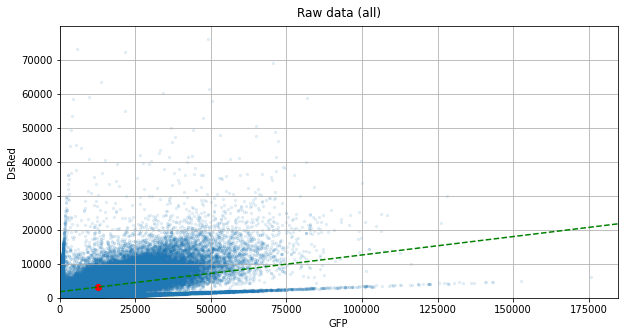

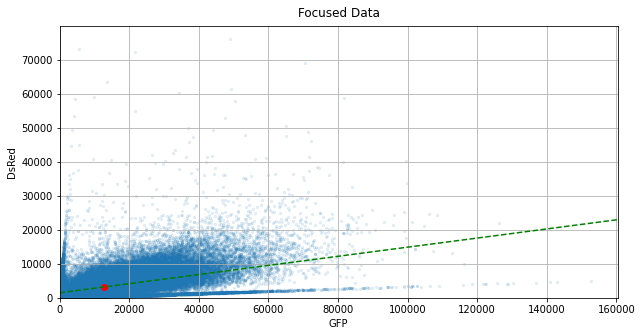

In [15]:
plt=plot_Raw_flourescence(df_pops_all["GFP"],df_pops_all["DsRed"],"Raw data (all)","GFP","DsRed",0,0)
plt.show()
plt.close()

df_pops=df_pops_all[(df_pops_all["Aspect Ratio_M01"]>.3)&(df_pops_all["Aspect Ratio_M01"]<.8)&
                 (df_pops_all["Gradient RMS_M01_Ch01"]>65)&(df_pops_all["Gradient RMS_M01_Ch01"]<85)
                ]

plt=plot_Raw_flourescence(df_pops["GFP"],df_pops["DsRed"],"Focused Data","GFP","DsRed",0,0)
plt.show()
plt.close()


In [0]:
gfp_limit=70000
rfp_limit=20000

## Making a DataFrame with no extreme values 
## normalize values
## transform to polar coordinates

In [17]:
df_pops_lim=df_pops[(df_pops["GFP"]<gfp_limit)&(df_pops["DsRed"]<rfp_limit)].copy()
gfpsN=df_pops_lim["GFP"]/gfp_limit
rfpsN=df_pops_lim["DsRed"]/rfp_limit
pops=df_pops_lim['pop']
ids=df_pops_lim['ids']


phis=[]
rhos=[]
for this_gfp,this_rfp in zip(gfpsN,rfpsN):
    this_phi,this_rho=cart2pol(this_gfp,this_rfp)
    phis.append(this_phi)
    rhos.append(this_rho)
    


tempDF=pd.DataFrame({"pop":pops,"ids":ids,"GFP_N":gfpsN,"DsRed_N":rfpsN,"phis_N":phis,"rhos_N":rhos})

df_pops_lim=pd.merge(df_pops_lim,tempDF,on=['pop','ids'])
df_pops_lim.tail()

,ids,Area_M01,Gradient RMS_M01_Ch01,Aspect Ratio_M01,GFP,DsRed,Intensity_MC_Ch12,pop,ratio,phis,rhos,GFP_N,DsRed_N,phis_N,rhos_N
213354,19988,35.666667,73.764972,0.681980,682.471154,7626.067308,6757.096154,pBRT,0.089492,1.481542,7656.544224,0.009750,0.381303,1.545233,0.381428
213355,19993,15.222222,73.614431,0.551380,256.307692,3409.533654,4403.062500,pBRT,0.075174,1.495764,3419.153897,0.003662,0.170477,1.549321,0.170516
213356,19994,17.666667,71.149294,0.643891,194.522727,1888.954545,3360.454545,pBRT,0.102979,1.468179,1898.944013,0.002779,0.094448,1.541382,0.094489
213357,19995,20.777778,66.785125,0.704495,238.570000,2081.405000,4486.020000,pBRT,0.114620,1.456675,2095.032797,0.003408,0.104070,1.538060,0.104126
213358,19998,27.555556,69.738051,0.636833,215.198276,3251.853448,3959.982759,pBRT,0.066177,1.504716,3258.966270,0.003074,0.162593,1.551891,0.162622


## Transform values to center mean on $\pi/2$, set G1 to $0$ and R12 to $\pi$


In [18]:
df_pops_limR=df_pops_lim[df_pops_lim["pop"]=="pBRT"].copy()
df_pops_limR=df_pops_limR[(df_pops_limR["phis"]>df_pops_limR.phis.mean()-2*df_pops_limR.phis.std())
                         &(df_pops_limR["phis"]<df_pops_limR.phis.mean()+2*df_pops_limR.phis.std())
                         ]
df_pops_limG=df_pops_lim[df_pops_lim["pop"]=="pBGT"].copy()
df_pops_limG=df_pops_limG[(df_pops_limG["phis"]>df_pops_limG.phis.mean()-2*df_pops_limG.phis.std())
                         &(df_pops_limG["phis"]<df_pops_limG.phis.mean()+2*df_pops_limG.phis.std())
                         ]


minPhi_N=df_pops_limG.phis_N.mean()#-(df_pops_limG.phis_N.std()*2)
maxPhi_N=df_pops_limR.phis_N.mean()#+(df_pops_limR.phis_N.std()*2)

### Taking the reference mean from balanced population 
meanPhi_N=df_pops_lim[df_pops_lim["pop"].str.contains("HT-1505")].phis_N.mean()   

rot_theta_N=np.pi/2- meanPhi_N

phis_Nrot=df_pops_lim['phis_N']+rot_theta_N
rhosN=df_pops_lim['rhos_N']




meanPhi_Nrot=meanPhi_N+rot_theta_N
minPhi_Nrot=minPhi_N+rot_theta_N
maxPhi_Nrot=maxPhi_N+rot_theta_N


maxRhoN99=rhosN.mean()+3*rhosN.std()
rhosN01=rhosN/maxRhoN99

phisN01=[]

for this_phi in phis_Nrot:
    phi01=((this_phi-minPhi_Nrot)/(maxPhi_Nrot-minPhi_Nrot))*np.pi
    if(this_phi<meanPhi_Nrot):
        phi01=((this_phi-minPhi_Nrot)/(meanPhi_Nrot-minPhi_Nrot))*np.pi/2
    
    else:
        phi01=((this_phi-meanPhi_Nrot)/(maxPhi_Nrot-meanPhi_Nrot)+1)*np.pi/2
    
    phisN01.append(phi01)




pops=df_pops_lim['pop']
ids=df_pops_lim['ids']

#tempDF=pd.DataFrame({"pop":pops,"ids":ids,"phis_rot":phis_rot,"phis_01":phis01,"rhos_01":rhos01,"phis_Nrot":phis_Nrot,"phis_N01":phisN01,"rhos_N01":rhosN01})
tempDF=pd.DataFrame({"pop":pops,"ids":ids,"phis_N01":phisN01,"rhos_N01":rhosN01})

df_pops_lim2=pd.merge(df_pops_lim,tempDF,on=['pop','ids'])
df_pops_lim2.describe()







,ids,Area_M01,Gradient RMS_M01_Ch01,Aspect Ratio_M01,GFP,DsRed,Intensity_MC_Ch12,ratio,phis,rhos,GFP_N,DsRed_N,phis_N,rhos_N,phis_N01,rhos_N01
count,213359.000000,213359.000000,213359.000000,213359.000000,213359.000000,213359.000000,213359.000000,213359.000000,213359.000000,213359.000000,213359.000000,213359.000000,213359.000000,213359.000000,213359.000000,213359.000000
mean,10032.633782,21.240906,71.061664,0.602513,12662.130020,3134.826273,4927.581861,5.886346,0.337488,13312.205597,0.180888,0.156741,0.745661,0.252210,1.687146,0.338154
std,5766.310765,6.523114,2.330125,0.096856,9581.776423,2421.564582,3079.455682,8.781770,0.337012,9519.256059,0.136883,0.121078,0.332998,0.164545,0.725654,0.220615
min,0.000000,4.444444,65.000045,0.300682,-463.500000,-150.034483,-1085.390625,-1730.794118,-3.111167,10.420622,-0.006621,-0.007502,-3.035469,0.000254,-9.770332,0.000341
25%,5047.000000,16.666667,69.262492,0.534501,6636.005344,1598.070437,2929.680707,2.759943,0.180906,7065.661755,0.094800,0.079904,0.569433,0.144349,1.409818,0.193538
50%,10047.000000,19.888889,71.019637,0.606777,10530.170732,2504.245370,4446.069444,3.987168,0.245580,10970.152634,0.150431,0.125212,0.720095,0.210048,1.738429,0.281624
75%,15027.000000,24.000000,72.845792,0.675094,16285.485027,3892.454167,6356.254630,5.460706,0.347263,16831.078649,0.232650,0.194623,0.902541,0.310749,2.048120,0.416640
max,19999.000000,67.777778,83.685842,0.799999,69976.653846,19997.523810,65550.340000,1338.434174,3.083171,71381.638954,0.999666,0.999876,2.939674,1.378682,5.506029,1.848485


 ## Calculate deviation over mean 

In [19]:

ref_df=df_pops_lim2[df_pops_lim2["pop"].str.contains("HT-1505")]

rphis_N01=list(ref_df["phis_N01"])

ref_mean_pN=np.mean(rphis_N01)

pops=df_pops_lim2['pop']
ids=df_pops_lim2['ids']


phis_N01=df_pops_lim2["phis_N01"]

dev_means=[]


for this_phi in phis_N01:
    this_dev_mean=ref_mean_pN-this_phi
    
    
    dev_means.append(this_dev_mean)
    

tempDF=pd.DataFrame({"pop":pops,"ids":ids,"dev_mean_N":dev_means})

df_pops_lim2=pd.merge(df_pops_lim2,tempDF,on=['pop','ids'])
df_pops_lim2.head()

,ids,Area_M01,Gradient RMS_M01_Ch01,Aspect Ratio_M01,GFP,DsRed,Intensity_MC_Ch12,pop,ratio,phis,rhos,GFP_N,DsRed_N,phis_N,rhos_N,phis_N01,rhos_N01,dev_mean_N
0,4,25.000000,66.639253,0.657805,20829.673077,754.394231,4548.548077,pBGT,27.611125,0.036201,20843.329656,0.297567,0.037720,0.126088,0.299948,0.034838,0.402159,1.450734
1,6,20.333333,67.339023,0.725893,16614.004310,550.637931,3036.297414,pBGT,30.172284,0.033131,16623.126702,0.237343,0.027532,0.115484,0.238934,0.001952,0.320354,1.483620
2,7,23.888889,66.552321,0.655608,19502.778846,605.072115,7223.956731,pBGT,32.232156,0.031015,19512.162745,0.278611,0.030254,0.108163,0.280249,-0.020753,0.375747,1.506325
3,8,19.666667,68.861615,0.670669,12709.785714,423.500000,4769.107143,pBGT,30.011300,0.033308,12716.839433,0.181568,0.021175,0.116098,0.182799,0.003856,0.245090,1.481716
4,9,20.777778,65.467471,0.765376,19680.620000,652.860000,3651.440000,pBGT,30.145238,0.033161,19691.445599,0.281152,0.032643,0.115587,0.283040,0.002270,0.379490,1.483302


## Getting angle cutoffs for homozygotes


(0.16041007741358518, 3.0489114503618335)

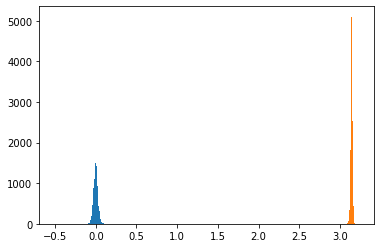

In [20]:
pop="pBGT"
sub_dfg=df_pops_lim2[df_pops_lim2["pop"]==pop].copy()
sub_dfgN01=sub_dfg[(sub_dfg["phis_N01"]<sub_dfg.phis_N01.mean()+3*sub_dfg.phis_N01.std())
             &(sub_dfg["phis_N01"]>sub_dfg.phis_N01.mean()-3*sub_dfg.phis_N01.std())
             ]

lphis=sub_dfgN01.phis_N01
rrange=np.linspace(lphis.min(),lphis.mean()+5*lphis.std(),100)
n,bins,patchess=plt.hist(lphis,bins=rrange)#,density='true')
#plt.yscale('log')
#plt.show()


g1_cutoffN=sub_dfgN01.phis_N01.mean()+5*sub_dfgN01.phis_N01.std()



pop="pBRT"
sub_dfr=df_pops_lim2[df_pops_lim2["pop"]==pop].copy()
sub_dfrN01=sub_dfr[(sub_dfr["phis_N01"]<sub_dfr.phis_N01.mean()+5*sub_dfr.phis_N01.std())
                  &(sub_dfr["phis_N01"]>sub_dfr.phis_N01.mean()-5*sub_dfr.phis_N01.std())
                  ]

lphis=sub_dfrN01.phis_N01
rrange=np.linspace(lphis.min(),lphis.mean()+5*lphis.std(),100)
n,bins,patchess=plt.hist(lphis,bins=rrange)#,density='true')
#plt.yscale('log')
#plt.show()


r12_cutoffN=sub_dfrN01.phis_N01.mean()-5*sub_dfrN01.phis_N01.std()


g1_cutoffN,r12_cutoffN

## Plots

### All plots setup

In [0]:
alph=.025
llim=5
Ncolors=50
#cmap = cm.get_cmap("RdYlGn", Ncolors)
angle_type="phis_N01"    

g1ct=g1_cutoffN
r12ct=r12_cutoffN

    
relAbs=dict()


### Plotting  **CAZ**

DescribeResult(nobs=56828, minmax=(-0.09969476467295879, 3.3186584392271743), mean=1.8149736105406686, variance=0.18818222598345716, skewness=-0.052615862496102256, kurtosis=1.426680662613001)
14 55966 848
Saving /content/drive/My Drive/SYNC_Projects/pHT/ms/figures/figure2_CAZ.png
Saving /content/drive/My Drive/SYNC_Projects/pHT/ms/figures/figure2_CAZ.pdf


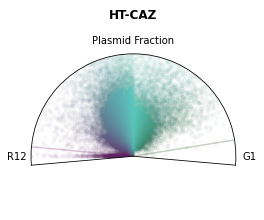

Saving /content/drive/My Drive/SYNC_Projects/pHT/ms/figures/figure2_dist_CAZ.png
Saving /content/drive/My Drive/SYNC_Projects/pHT/ms/figures/figure2_dist_CAZ.pdf


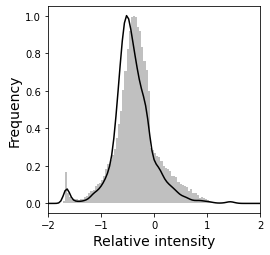

In [22]:
this_df=df_pops_lim2[df_pops_lim2["pop"].str.contains("HT-C12")]
ref_df0=df_pops_lim2[df_pops_lim2["pop"].str.contains("HT-1505")]
ref_df=df_pops_lim2[df_pops_lim2["pop"].str.contains("HT-LB")]


name="HT-CAZ"



fig= plt.figure( figsize=(3.8,3.8))
ax=fig.add_subplot(111,projection='polar') 

ax,gn_c,htn_c,rn_c,ms=plot_polar_fancy_cutoffs(ax,this_df,ref_df,alph,llim,name,angle_type,g1ct,r12ct)


fileName=figuresDir+'figure2_CAZ.png'
print("Saving "+fileName)
plt.savefig(fileName, rasterized=True)
fileName=figuresDir+'figure2_CAZ.pdf'
print("Saving "+fileName)
plt.savefig(fileName, rasterized=True)



plt.show()


plt.show()
relAbs[name]=[gn_c,htn_c,rn_c]


prop="dev_mean_N"
lrange=np.linspace(-2,2,101)

fig,ax=plt.subplots(figsize=(3.8,3.8))
ax=plot_distributions_mix(ax,this_df,ref_df,lrange,prop)

ax.set_xlabel('Relative intensity',fontsize=14)
ax.set_ylabel('Frequency',fontsize=14)

fileName=figuresDir+'figure2_dist_CAZ.png'
print("Saving "+fileName)
#plt.savefig(fileName, rasterized=True)
fileName=figuresDir+'figure2_dist_CAZ.pdf'
print("Saving "+fileName)
#plt.savefig(fileName, rasterized=True)

plt.show()



### Plotting  **AMP**


DescribeResult(nobs=56197, minmax=(-1.5811838348502503, 3.2415352733665266), mean=1.8496850257276762, variance=0.3332870483393764, skewness=-0.7793900738587407, kurtosis=1.7142976329133095)
1193 53168 1836
Saving /content/drive/My Drive/SYNC_Projects/pHT/ms/figures/figure2_AMP.png
Saving /content/drive/My Drive/SYNC_Projects/pHT/ms/figures/figure2_AMP.pdf


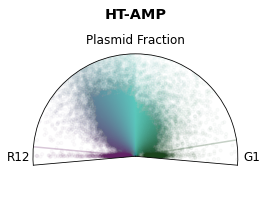

Saving /content/drive/My Drive/SYNC_Projects/pHT/ms/figures/figure2_dist_AMP.png
Saving /content/drive/My Drive/SYNC_Projects/pHT/ms/figures/figure2_dist_AMP.pdf


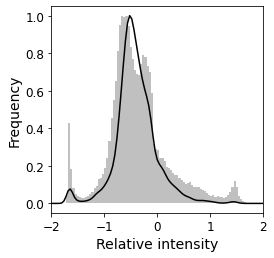

In [23]:
name="HT-AMP"
this_df=df_pops_lim2[df_pops_lim2["pop"].str.contains("HT-A25")]
ref_df=df_pops_lim2[df_pops_lim2["pop"].str.contains("HT-1505")]
ref_df=df_pops_lim2[df_pops_lim2["pop"].str.contains("HT-LB")]

fig= plt.figure( figsize=(3.8, 3.8))

mpl.rcParams.update({'font.size':12})
ax=fig.add_subplot(111,projection='polar') 

ax,gn_a,htn_a,rn_a,ms=plot_polar_fancy_cutoffs(ax,this_df,ref_df,alph,llim,name,angle_type,g1ct,r12ct)

fileName=figuresDir+'figure2_AMP.png'
print("Saving "+fileName)
plt.savefig(fileName, rasterized=True)
fileName=figuresDir+'figure2_AMP.pdf'
print("Saving "+fileName)
plt.savefig(fileName, rasterized=True)

plt.show()
relAbs[name]=[gn_a,htn_a,rn_a]

prop="dev_mean_N"
lrange=np.linspace(-2,2,101)

fig,ax=plt.subplots(figsize=(3.8,3.8))

mpl.rcParams.update({'font.size':12})

ax=plot_distributions_mix(ax,this_df,ref_df,lrange,prop)
ax.set_xlabel('Relative intensity', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)
#plt.title("%s - %s"%(name,prop))

fileName=figuresDir+'figure2_dist_AMP.png'
print("Saving "+fileName)
#plt.savefig(fileName, rasterized=True)
fileName=figuresDir+'figure2_dist_AMP.pdf'
print("Saving "+fileName)
#plt.savefig(fileName, rasterized=True)

plt.show()



DescribeResult(nobs=17888, minmax=(-0.05831723127747135, 3.185169950614718), mean=1.8907317057488888, variance=0.15112352214176705, skewness=-0.26487451340816837, kurtosis=3.139057113721057)
44 17529 315


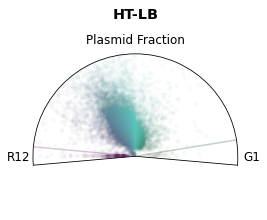

In [24]:
name="HT-LB"
this_df=df_pops_lim2[df_pops_lim2["pop"].str.contains("HT-LB")]
ref_df=df_pops_lim2[df_pops_lim2["pop"].str.contains("HT-LB")]


fig= plt.figure( figsize=(3.8, 3.8))

mpl.rcParams.update({'font.size':12})
ax=fig.add_subplot(111,projection='polar') 

ax,gn_h,htn_h,rn_h,ms=plot_polar_fancy_cutoffs(ax,this_df,ref_df,alph,llim,name,angle_type,g1ct,r12ct)

relAbs[name]=[gn_h,htn_h,rn_h]

In [25]:
relAbs

{'HT-AMP': [1193, 53168, 1836],
 'HT-CAZ': [14, 55966, 848],
 'HT-LB': [44, 17529, 315]}

### Plotting  **Relative abundances**



## Round0

[0.00024709267628471077, 0.0024597495527728087, 0.021227344355128772] [0.9848613907175703, 0.979930679785331, 0.9461018407131467] [0.01489151660614498, 0.017609570661896244, 0.03267081493172442]
[9.262563455748494e-05, 0.0, 0.0035323811835525592] [0.0019410507210004266, 0.0, 0.01017352117756685] [0.0019485533260285648, 0.0, 0.006642148670807978]
[9.262563455748494e-05, 0.0, 0.0035323811835525592] [0.0019410507210004266, 0.0, 0.01017352117756685] [0.0019485533260285648, 0.0, 0.006642148670807978]
(0.00024709267628471077, 1.5144129541145965)


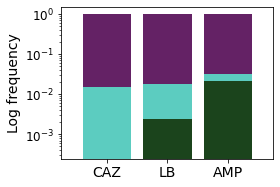

In [26]:

relAbs2=dict()
amps_envs=['HT-A25-1', 'HT-A25-2', 'HT-A25-3']
amps_gs,amps_hs,amps_rs=get_strain_counts_by_env(df_pops_lim2,amps_envs,angle_type,g1ct,r12ct)
relAbs2["HT-AMP"]=[amps_gs,amps_hs,amps_rs]

cazs_envs=["HT-C12-1","HT-C12-2","HT-C12-3"]
cazs_gs,cazs_hs,cazs_rs=get_strain_counts_by_env(df_pops_lim2,cazs_envs,angle_type,g1ct,r12ct)
relAbs2["HT-CAZ"]=[cazs_gs,cazs_hs,cazs_rs]

lb_env=["HT-LB"]
lbs_gs,lbs_hs,lbs_rs=get_strain_counts_by_env(df_pops_lim2,lb_env,angle_type,g1ct,r12ct)
relAbs2["HT-LB"]=[lbs_gs,lbs_hs,lbs_rs]

#print(relAbs2)

fig= plt.figure( figsize=(3.8,2.8))
axb=fig.add_subplot(111) 

labels=['HT-CAZ','HT-LB','HT-AMP']

# gs1=[]
# hs1=[]
# rs1=[]
# for lab in labels:
#   [gc,hc,rc]=relAbs[lab]
#   this_tot=gc+hc+rc
#   gs1.append(gc/this_tot)
#   hs1.append(hc/this_tot)
#   rs1.append(rc/this_tot)
# print(gs1,hs1,rs1)

gs1mean=[]
hs1mean=[]
rs1mean=[]
gs1std=[]
hs1std=[]
rs1std=[]


for lab in labels:
  [gV,hV,rV]=relAbs2[lab]
  
  this_tots=[gc+hc+rc for gc,hc,rc in zip(gV,hV,rV)]
  gVn=[x/this_tot for x,this_tot in zip(gV,this_tots)]
  hVn=[x/this_tot for x,this_tot in zip(hV,this_tots)]
  rVn=[x/this_tot for x,this_tot in zip(rV,this_tots)]
  
  gs1mean.append(np.mean(gVn)) 
  hs1mean.append(np.mean(hVn))
  rs1mean.append(np.mean(rVn))

  gs1std.append(np.std(gVn))
  hs1std.append(np.std(hVn))
  rs1std.append(np.std(rVn))

print(gs1mean,hs1mean,rs1mean)
print(gs1std,hs1std,rs1std)


x=[1,2,3]

print(gs1std,hs1std,rs1std)


axb.bar(x,gs1mean,color=colors[2])#,yerr=gs1std)
axb.bar(x,rs1mean,bottom=gs1mean,color=colors[1])#,yerr=rs1std)
axb.bar(x,hs1mean,bottom=rs1mean,color=colors[0])#,yerr=hs1std)


axb.set_xticks(x)
axb.set_xticklabels(['CAZ','LB','AMP'],fontsize=14)
axb.set_xlim([0.25, 3.75])

#axb.set_ylim([1e-4, 1.1])
axb.set_ylabel('Log frequency',fontsize=14)
axb.set_yscale("log")#,nonposy="clip")
this_ylims=axb.get_ylim()
print(this_ylims)
# fileName=figuresDir+'figure2_relFreq.pdf'
# print("Saving "+fileName)
# plt.savefig(fileName, rasterized=True)

plt.show()


### Replicates no LBs

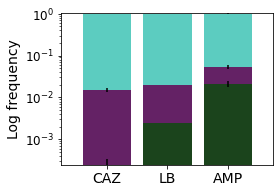

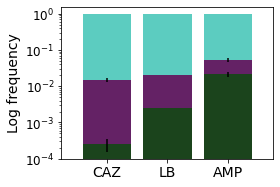

In [27]:
relAbs2=dict()
amps_envs=['HT-A25-1', 'HT-A25-2', 'HT-A25-3']
amps_gs,amps_hs,amps_rs=get_strain_counts_by_env(df_pops_lim2,amps_envs,angle_type,g1ct,r12ct)
relAbs2["HT-AMP"]=[amps_gs,amps_hs,amps_rs]

cazs_envs=["HT-C12-1","HT-C12-2","HT-C12-3"]
cazs_gs,cazs_hs,cazs_rs=get_strain_counts_by_env(df_pops_lim2,cazs_envs,angle_type,g1ct,r12ct)
relAbs2["HT-CAZ"]=[cazs_gs,cazs_hs,cazs_rs]

lb_env=["HT-LB"]
lbs_gs,lbs_hs,lbs_rs=get_strain_counts_by_env(df_pops_lim2,lb_env,angle_type,g1ct,r12ct)
relAbs2["HT-LB"]=[lbs_gs,lbs_hs,lbs_rs]

amps_envs=['HT-A25-1', 'HT-A25-2', 'HT-A25-3']
bals_gs,bals_hs,bals_rs=get_strain_counts_by_env(df_pops_lim2,lb_env,angle_type,g1ct,r12ct)
relAbs2["HT-BAL"]=[lbs_gs,lbs_hs,lbs_rs]

#print(relAbs2)

labels=['HT-CAZ','HT-LB','HT-AMP']
gs1mean=[]
hs1mean=[]
rs1mean=[]
gs1std=[]
hs1std=[]
rs1std=[]

for lab in labels:
  [gV,hV,rV]=relAbs2[lab]
  
  this_tots=[gc+hc+rc for gc,hc,rc in zip(gV,hV,rV)]
  gVn=[x/this_tot for x,this_tot in zip(gV,this_tots)]
  hVn=[x/this_tot for x,this_tot in zip(hV,this_tots)]
  rVn=[x/this_tot for x,this_tot in zip(rV,this_tots)]
  
  gs1mean.append(round(np.mean(gVn),10)) 
  hs1mean.append(round(np.mean(hVn),10))
  rs1mean.append(round(np.mean(rVn),10))

  gs1std.append(round(np.std(gVn),10))
  hs1std.append(round(np.std(hVn),10))
  rs1std.append(round(np.std(rVn),10))



x=[1,2,3]

rg=[r+g for r,g in zip(rs1mean,gs1mean)]

fig= plt.figure( figsize=(3.8,2.8))
axb=fig.add_subplot(111) 

axb.bar(x,gs1mean,color=colors[2],yerr=gs1std)
axb.bar(x,rs1mean,bottom=gs1mean,color=colors[0],yerr=rs1std)
axb.bar(x,hs1mean,bottom=rg,color=colors[1],yerr=hs1std)

axb.set_xticks(x)
axb.set_xticklabels(['CAZ','LB','AMP'],fontsize=14)
axb.set_xlim([0.25, 3.75])

axb.set_ylim(ymin=this_ylims[0])  #  <--------------------- look from round0
axb.set_ylabel('Log frequency',fontsize=14)
axb.set_yscale("log",nonposy="clip")

# fileName=figuresDir+'figure2_relFreq.pdf'
# print("Saving "+fileName)
# plt.savefig(fileName, rasterized=True)

plt.show()
##########################################################
fig= plt.figure( figsize=(3.8,2.8))
axb=fig.add_subplot(111) 

axb.bar(x,gs1mean,color=colors[2],yerr=gs1std)
axb.bar(x,rs1mean,bottom=gs1mean,color=colors[0],yerr=rs1std)
axb.bar(x,hs1mean,bottom=rg,color=colors[1],yerr=hs1std)

axb.set_xticks(x)
axb.set_xticklabels(['CAZ','LB','AMP'],fontsize=14)
axb.set_xlim([0.25, 3.75])

#axb.set_ylim(ymin=this_ylims[0])
axb.set_ylabel('Log frequency',fontsize=14)
axb.set_yscale("log",nonposy="clip")

# fileName=figuresDir+'figure2_relFreq.pdf'
# print("Saving "+fileName)
# plt.savefig(fileName, rasterized=True)

plt.show()


### Replicates plus LBs  error bars

incorporating data from LB experiment


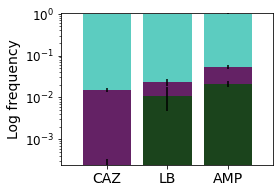

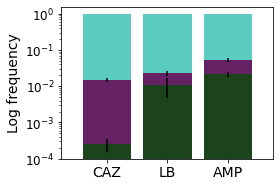

In [28]:
relAbs2=dict()
amps_envs=['HT-A25-1', 'HT-A25-2', 'HT-A25-3']
amps_gs,amps_hs,amps_rs=get_strain_counts_by_env(df_pops_lim2,amps_envs,angle_type,g1ct,r12ct)
relAbs2["HT-AMP"]=[amps_gs,amps_hs,amps_rs]

cazs_envs=["HT-C12-1","HT-C12-2","HT-C12-3"]
cazs_gs,cazs_hs,cazs_rs=get_strain_counts_by_env(df_pops_lim2,cazs_envs,angle_type,g1ct,r12ct)
relAbs2["HT-CAZ"]=[cazs_gs,cazs_hs,cazs_rs]

lb_env=["HT-LB"]
lbs_gs,lbs_hs,lbs_rs=get_strain_counts_by_env(df_pops_lim2,lb_env,angle_type,g1ct,r12ct)
relAbs2["HT-LB"]=[lbs_gs,lbs_hs,lbs_rs]

amps_envs=['HT-A25-1', 'HT-A25-2', 'HT-A25-3']
bals_gs,bals_hs,bals_rs=get_strain_counts_by_env(df_pops_lim2,lb_env,angle_type,g1ct,r12ct)
relAbs2["HT-BAL"]=[lbs_gs,lbs_hs,lbs_rs]

#######################################################################333
print("incorporating data from LB experiment")
lb_ext_rep1= [[1694], [97433], [834]]  # <------- data from LB dispersion S8 (181207)
lb_ext_rep2= [[139], [9726], [93]]     # <------- data from LB dispersion S6 (190207)

for i in range(0,3):
  relAbs2["HT-LB"][i].append(lb_ext_rep1[i][0])
  relAbs2["HT-LB"][i].append(lb_ext_rep2[i][0])
################################################################


labels=['HT-CAZ','HT-LB','HT-AMP']
gs1mean=[]
hs1mean=[]
rs1mean=[]
gs1std=[]
hs1std=[]
rs1std=[]

for lab in labels:
  [gV,hV,rV]=relAbs2[lab]
  
  this_tots=[gc+hc+rc for gc,hc,rc in zip(gV,hV,rV)]
  gVn=[x/this_tot for x,this_tot in zip(gV,this_tots)]
  hVn=[x/this_tot for x,this_tot in zip(hV,this_tots)]
  rVn=[x/this_tot for x,this_tot in zip(rV,this_tots)]
  
  gs1mean.append(round(np.mean(gVn),10)) 
  hs1mean.append(round(np.mean(hVn),10))
  rs1mean.append(round(np.mean(rVn),10))

  gs1std.append(round(np.std(gVn),10))
  hs1std.append(round(np.std(hVn),10))
  rs1std.append(round(np.std(rVn),10))



x=[1,2,3]

rg=[r+g for r,g in zip(rs1mean,gs1mean)]

fig= plt.figure( figsize=(3.8,2.8))
axb=fig.add_subplot(111) 

axb.bar(x,gs1mean,color=colors[2],yerr=gs1std)
axb.bar(x,rs1mean,bottom=gs1mean,color=colors[0],yerr=rs1std)
axb.bar(x,hs1mean,bottom=rg,color=colors[1],yerr=hs1std)

axb.set_xticks(x)
axb.set_xticklabels(['CAZ','LB','AMP'],fontsize=14)
axb.set_xlim([0.25, 3.75])

axb.set_ylim(ymin=this_ylims[0])  #  <--------------------- look from round0
axb.set_ylabel('Log frequency',fontsize=14)
axb.set_yscale("log",nonposy="clip")

# fileName=figuresDir+'figure2_relFreq.pdf'
# print("Saving "+fileName)
# plt.savefig(fileName, rasterized=True)

plt.show()
##########################################################
fig= plt.figure( figsize=(3.8,2.8))
axb=fig.add_subplot(111) 

axb.bar(x,gs1mean,color=colors[2],yerr=gs1std)
axb.bar(x,rs1mean,bottom=gs1mean,color=colors[0],yerr=rs1std)
axb.bar(x,hs1mean,bottom=rg,color=colors[1],yerr=hs1std)

axb.set_xticks(x)
axb.set_xticklabels(['CAZ','LB','AMP'],fontsize=14)
axb.set_xlim([0.25, 3.75])

#axb.set_ylim(ymin=this_ylims[0])
axb.set_ylabel('Log frequency',fontsize=14)
axb.set_yscale("log",nonposy="clip")

# fileName=figuresDir+'figure2_relFreq.pdf'
# print("Saving "+fileName)
# plt.savefig(fileName, rasterized=True)

plt.show()


#### Multiple bars no LB

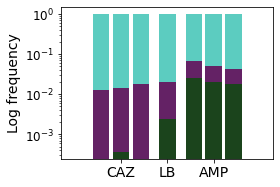

In [29]:

relAbsreps=dict()
amps_envs=['HT-A25-1', 'HT-A25-2', 'HT-A25-3']
amps_gs,amps_hs,amps_rs=get_strain_counts_by_env(df_pops_lim2,amps_envs,angle_type,g1ct,r12ct)
relAbsreps["HT-AMP"]=[amps_gs,amps_hs,amps_rs]

cazs_envs=["HT-C12-1","HT-C12-2","HT-C12-3"]
cazs_gs,cazs_hs,cazs_rs=get_strain_counts_by_env(df_pops_lim2,cazs_envs,angle_type,g1ct,r12ct)
relAbsreps["HT-CAZ"]=[cazs_gs,cazs_hs,cazs_rs]

lb_env=["HT-LB"]
lbs_gs,lbs_hs,lbs_rs=get_strain_counts_by_env(df_pops_lim2,lb_env,angle_type,g1ct,r12ct)
relAbsreps["HT-LB"]=[lbs_gs,lbs_hs,lbs_rs]

#print(relAbs2)

labels=['HT-CAZ','HT-LB','HT-AMP']
gs1V=[]
hs1V=[]
rs1V=[]

for lab in labels:
  [gV,hV,rV]=relAbsreps[lab]
  
  this_tots=[gc+hc+rc for gc,hc,rc in zip(gV,hV,rV)]
  gVn=[x/this_tot for x,this_tot in zip(gV,this_tots)]
  hVn=[x/this_tot for x,this_tot in zip(hV,this_tots)]
  rVn=[x/this_tot for x,this_tot in zip(rV,this_tots)]
  
  for x in gVn:
    gs1V.append(x) 
  for x in hVn:
    hs1V.append(x)
  for x in rVn:
    rs1V.append(x)




fig= plt.figure( figsize=(3.8,2.8))
axb=fig.add_subplot(111) 

dx=0.3
xm=[1,2,3]
xm=[1+dx,2,3-dx]
x1=[xm[0]-dx,xm[0],xm[0]+dx]
x2=[xm[1]]
x3=[xm[2]-dx,xm[2],xm[2]+dx]

x=x1+x2+x3
rgV=[r+g for r,g in zip(rs1V,gs1V)]

axb.bar(x,gs1V,.25,color=colors[2])
axb.bar(x,rs1V,.25,bottom=gs1V,color=colors[0])
axb.bar(x,hs1V,.25,bottom=rgV,color=colors[1])


axb.set_yscale("log")
axb.set_xticks(xm)
axb.set_xticklabels(['CAZ','LB','AMP'],fontsize=14)
axb.set_xlim([1-2*dx, 3+2*dx])
axb.set_ylim(ymin=this_ylims[0])  #  <--------------------- scale from round0

axb.set_ylabel('Log frequency',fontsize=14)


#fileName=figuresDir+'figure2_relFreq.pdf'
#print("Saving "+fileName)
#plt.savefig(fileName, rasterized=True)

plt.show()


#### Multiple bars plus LB

In [30]:
relAbsreps

{'HT-AMP': [[486, 380, 327], [17379, 18160, 17629], [780, 571, 485]],
 'HT-CAZ': [[3, 7, 4], [18537, 18383, 19046], [245, 262, 341]],
 'HT-LB': [[44], [17529], [315]]}

Saving /content/drive/My Drive/SYNC_Projects/pHT/ms/figures/figure2_relFreq.pdf


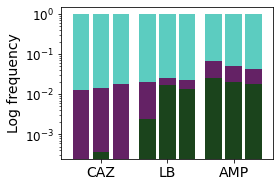

In [32]:

relAbsreps=dict()
amps_envs=['HT-A25-1', 'HT-A25-2', 'HT-A25-3']
amps_gs,amps_hs,amps_rs=get_strain_counts_by_env(df_pops_lim2,amps_envs,angle_type,g1ct,r12ct)
relAbsreps["HT-AMP"]=[amps_gs,amps_hs,amps_rs]

cazs_envs=["HT-C12-1","HT-C12-2","HT-C12-3"]
cazs_gs,cazs_hs,cazs_rs=get_strain_counts_by_env(df_pops_lim2,cazs_envs,angle_type,g1ct,r12ct)
relAbsreps["HT-CAZ"]=[cazs_gs,cazs_hs,cazs_rs]

lb_env=["HT-LB"]
lbs_gs,lbs_hs,lbs_rs=get_strain_counts_by_env(df_pops_lim2,lb_env,angle_type,g1ct,r12ct)
relAbsreps["HT-LB"]=[lbs_gs,lbs_hs,lbs_rs]


#######################################################################333
#print("incorporating data from LB experiment")
lb_ext_rep1= [[1694], [97433], [834]]  # <------- data from LB dispersion S8 (181207)
lb_ext_rep2= [[139], [9726], [93]]     # <------- data from LB dispersion S6 (190207)

for i in range(0,3):
  relAbsreps["HT-LB"][i].append(lb_ext_rep1[i][0])
  relAbsreps["HT-LB"][i].append(lb_ext_rep2[i][0])
################################################################




labels=['HT-CAZ','HT-LB','HT-AMP']
gs1V=[]
hs1V=[]
rs1V=[]

for lab in labels:
  [gV,hV,rV]=relAbsreps[lab]
  
  this_tots=[gc+hc+rc for gc,hc,rc in zip(gV,hV,rV)]
  gVn=[x/this_tot for x,this_tot in zip(gV,this_tots)]
  hVn=[x/this_tot for x,this_tot in zip(hV,this_tots)]
  rVn=[x/this_tot for x,this_tot in zip(rV,this_tots)]
  
  for x in gVn:
    gs1V.append(x) 
  for x in hVn:
    hs1V.append(x)
  for x in rVn:
    rs1V.append(x)




fig= plt.figure( figsize=(3.8,2.8))
axb=fig.add_subplot(111) 

dx=0.3
xm=[1,2,3]
#xm=[1+dx,2,3-dx]
x1=[xm[0]-dx,xm[0],xm[0]+dx]
x2=[xm[1]-dx,xm[1],xm[1]+dx]
x3=[xm[2]-dx,xm[2],xm[2]+dx]

x=x1+x2+x3
rgV=[r+g for r,g in zip(rs1V,gs1V)]

axb.bar(x,gs1V,.25,color=colors[2])
axb.bar(x,rs1V,.25,bottom=gs1V,color=colors[0])
axb.bar(x,hs1V,.25,bottom=rgV,color=colors[1])


axb.set_yscale("log")
axb.set_xticks(xm)
axb.set_xticklabels(['CAZ','LB','AMP'],fontsize=14)
axb.set_xlim([1-2*dx, 3+2*dx])
axb.set_ylim(ymin=this_ylims[0])  #  <--------------------- scale from round0

axb.set_ylabel('Log frequency',fontsize=14)


fileName=figuresDir+'figure2_relFreq.pdf'
print("Saving "+fileName)
plt.savefig(fileName, rasterized=True)

plt.show()


## Plot relative fitness

Text(0, 0.5, 'Relative fitness')

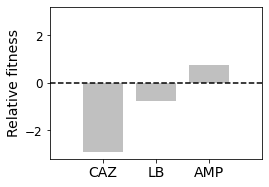

In [34]:
relAbsM=dict()
amps_envs=["HT-A25"]
amps_gs,amps_hs,amps_rs=get_strain_counts_by_env(df_pops_lim2,amps_envs,angle_type,g1ct,r12ct)
relAbsM["HT-AMP"]=[amps_gs,amps_hs,amps_rs]

cazs_envs=["HT-C12"]
cazs_gs,cazs_hs,cazs_rs=get_strain_counts_by_env(df_pops_lim2,cazs_envs,angle_type,g1ct,r12ct)
relAbsM["HT-CAZ"]=[cazs_gs,cazs_hs,cazs_rs]

lb_env=["HT-LB"]
lbs_gs,lbs_hs,lbs_rs=get_strain_counts_by_env(df_pops_lim2,lb_env,angle_type,g1ct,r12ct)
relAbsM["HT-LB"]=[lbs_gs,lbs_hs,lbs_rs]

bals_env=["HT-1505"]
bals_gs,bals_hs,bals_rs=get_strain_counts_by_env(df_pops_lim2,bals_env,angle_type,g1ct,r12ct)
relAbsM["HT-BAL"]=[bals_gs,bals_hs,bals_rs]


rn_bal=relAbsM["HT-BAL"][2][0]
gn_bal=relAbsM["HT-BAL"][0][0]
dataM=[]
names=["HT-CAZ","HT-LB","HT-AMP"]
for name in names:
  rn_t=relAbsM[name][2][0]
  gn_t=relAbsM[name][0][0]

  thisM=get_relfit_logout(rn_bal,rn_t,gn_bal,gn_t)
  
  dataM.append(thisM)



fig,ax=plt.subplots(figsize=(3.8,2.8))    
pos=[1,2,3]
#cmap =cm.get_cmap('cool')   
data=dataM
bin_size=.75


for ib, b in enumerate(data):
    ax.add_patch(
        patches.Rectangle(
            (pos[ib]-bin_size/2, 0),   # (x,y)
            bin_size,          # width
            data[ib],          # height
            facecolor='silver' #colors[ib]
        )
    )

ax.axhline(y=0,c='k',linestyle="dashed")
ax.set_xlim([0,4])
ax.set_ylim([-3.2,3.2])
ax.set_xticks(pos)
ax.set_xticklabels(['CAZ','LB','AMP'],fontsize=14)
ax.set_ylabel("Relative fitness",fontsize=14)

#fileName=figuresDir+'figure2_relFitness.pdf'
#print("Saving "+fileName)
#plt.savefig(fileName, rasterized=True)


## Plot relative fitness  reps


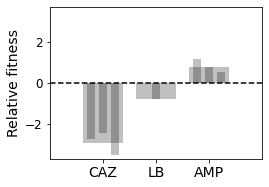

In [35]:
relAbsM=dict()
amps_envs=["HT-A25"]
amps_gs,amps_hs,amps_rs=get_strain_counts_by_env(df_pops_lim2,amps_envs,angle_type,g1ct,r12ct)
relAbsM["HT-AMP"]=[amps_gs,amps_hs,amps_rs]

cazs_envs=["HT-C12"]
cazs_gs,cazs_hs,cazs_rs=get_strain_counts_by_env(df_pops_lim2,cazs_envs,angle_type,g1ct,r12ct)
relAbsM["HT-CAZ"]=[cazs_gs,cazs_hs,cazs_rs]

lb_env=["HT-LB"]
lbs_gs,lbs_hs,lbs_rs=get_strain_counts_by_env(df_pops_lim2,lb_env,angle_type,g1ct,r12ct)
relAbsM["HT-LB"]=[lbs_gs,lbs_hs,lbs_rs]

bals_env=["HT-1505"]
bals_gs,bals_hs,bals_rs=get_strain_counts_by_env(df_pops_lim2,bals_env,angle_type,g1ct,r12ct)
relAbsM["HT-BAL"]=[bals_gs,bals_hs,bals_rs]


rn_bal=relAbsM["HT-BAL"][2][0]
gn_bal=relAbsM["HT-BAL"][0][0]
dataM=[]
names=["HT-CAZ","HT-LB","HT-AMP"]
for name in names:
  rn_t=relAbsM[name][2][0]
  gn_t=relAbsM[name][0][0]

  thisM=get_relfit_logout(rn_bal,rn_t,gn_bal,gn_t)
  
  dataM.append(thisM)



bals_envs=['HT-1505-1', 'HT-1505-2', 'HT-1505-3']
bals_gs,bals_hs,bals_rs=get_strain_counts_by_env(df_pops_lim2,bals_envs,angle_type,g1ct,r12ct)
relAbsreps["HT-bals"]=[bals_gs,bals_hs,bals_rs]

lb_env=["HT-LB"]
lbs_gs,lbs_hs,lbs_rs=get_strain_counts_by_env(df_pops_lim2,lb_env,angle_type,g1ct,r12ct)
relAbsreps["HT-LB"]=[lbs_gs,lbs_hs,lbs_rs]


names=["HT-CAZ","HT-LB","HT-AMP"]

relfitV=[]

for i in range(0,3):
  relAbsreps["HT-bals"]
  gn_bal=relAbsreps["HT-bals"][0][i]
  rn_bal=relAbsreps["HT-bals"][2][i]
  gn_c=relAbsreps["HT-CAZ"][0][i]
  rn_c=relAbsreps["HT-CAZ"][2][i]
  
  this_relfit=get_relfit_logout(rn_bal,rn_c,gn_bal,gn_c)
  relfitV.append(this_relfit)

relfitV.append(dataM[1])  ###LB

for i in range(0,3):
  relAbsreps["HT-bals"]
  gn_bal=relAbsreps["HT-bals"][0][i]
  rn_bal=relAbsreps["HT-bals"][2][i]
  gn_c=relAbsreps["HT-AMP"][0][i]
  rn_c=relAbsreps["HT-AMP"][2][i]
  
  this_relfit=get_relfit_logout(rn_bal,rn_c,gn_bal,gn_c)
  relfitV.append(this_relfit)


fig,ax=plt.subplots(figsize=(3.8,2.8)) 
##############plot means ############
data=dataM

pos=[1,2,3]

bin_size=.75

for ib, b in enumerate(data):
    ax.add_patch(
        patches.Rectangle(
            (pos[ib]-bin_size/2, 0),   # (x,y)
            bin_size,          # width
            data[ib],          # height
            facecolor='silver' #colors[ib]
        )
    )

############plot reps ##############
data=relfitV

dx=bin_size/10
#dx=.25
dxpad=dx/4 #0.05
posreps=[pos[0]-4*dx,pos[0]-dx,pos[0]+2*dx,
         pos[1]-dx,
         pos[2]-4*dx,pos[2]-dx,pos[2]+2*dx]
#bin_size=dx-dxpad*3
bin_size=dx*2

for ib, b in enumerate(data):
    ax.add_patch(
        patches.Rectangle(
            (
            posreps[ib], 0),
            bin_size,          # width
            data[ib],          # height
            alpha=0.25,
            facecolor='k' #colors[ib]
        )
    )

###################
ax.axhline(y=0,c='k',linestyle="dashed")
ax.set_xlim([0,4])
ax.set_ylim([-3.7,3.7])
ax.set_xticks(pos)
ax.set_xticklabels(['CAZ','LB','AMP'],fontsize=14)
ax.set_ylabel("Relative fitness",fontsize=14)

#fileName=figuresDir+'figure2_relFitness.pdf'
#print("Saving "+fileName)
#plt.savefig(fileName, rasterized=True)
plt.show()


Saving /content/drive/My Drive/SYNC_Projects/pHT/ms/figures/figure2_relFitness.pdf


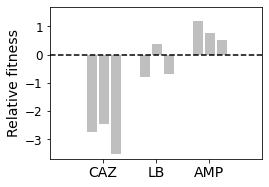

In [44]:
relAbsM=dict()
amps_envs=["HT-A25"]
amps_gs,amps_hs,amps_rs=get_strain_counts_by_env(df_pops_lim2,amps_envs,angle_type,g1ct,r12ct)
relAbsM["HT-AMP"]=[amps_gs,amps_hs,amps_rs]

cazs_envs=["HT-C12"]
cazs_gs,cazs_hs,cazs_rs=get_strain_counts_by_env(df_pops_lim2,cazs_envs,angle_type,g1ct,r12ct)
relAbsM["HT-CAZ"]=[cazs_gs,cazs_hs,cazs_rs]

lb_env=["HT-LB"]
lbs_gs,lbs_hs,lbs_rs=get_strain_counts_by_env(df_pops_lim2,lb_env,angle_type,g1ct,r12ct)
relAbsM["HT-LB"]=[lbs_gs,lbs_hs,lbs_rs]

bals_env=["HT-1505"]
bals_gs,bals_hs,bals_rs=get_strain_counts_by_env(df_pops_lim2,bals_env,angle_type,g1ct,r12ct)
relAbsM["HT-BAL"]=[bals_gs,bals_hs,bals_rs]


rn_bal=relAbsM["HT-BAL"][2][0]
gn_bal=relAbsM["HT-BAL"][0][0]
dataM=[]
names=["HT-CAZ","HT-LB","HT-AMP"]
for name in names:
  rn_t=relAbsM[name][2][0]
  gn_t=relAbsM[name][0][0]

  thisM=get_relfit_logout(rn_bal,rn_t,gn_bal,gn_t)
  
  dataM.append(thisM)



bals_envs=['HT-1505-1', 'HT-1505-2', 'HT-1505-3']
bals_gs,bals_hs,bals_rs=get_strain_counts_by_env(df_pops_lim2,bals_envs,angle_type,g1ct,r12ct)
relAbsreps["HT-bals"]=[bals_gs,bals_hs,bals_rs]

lb_env=["HT-LB"]
lbs_gs,lbs_hs,lbs_rs=get_strain_counts_by_env(df_pops_lim2,lb_env,angle_type,g1ct,r12ct)
relAbsreps["HT-LB"]=[lbs_gs,lbs_hs,lbs_rs]


names=["HT-CAZ","HT-LB","HT-AMP"]

relfitV=[]

for i in range(0,3):
  relAbsreps["HT-bals"]
  gn_bal=relAbsreps["HT-bals"][0][i]
  rn_bal=relAbsreps["HT-bals"][2][i]
  gn_c=relAbsreps["HT-CAZ"][0][i]
  rn_c=relAbsreps["HT-CAZ"][2][i]
  
  this_relfit=get_relfit_logout(rn_bal,rn_c,gn_bal,gn_c)
  relfitV.append(this_relfit)

relfitV.append(dataM[1])  ###LB
relfitV.append(0.3737035630107395)
relfitV.append(-0.6825939030690668)

for i in range(0,3):
  relAbsreps["HT-bals"]
  gn_bal=relAbsreps["HT-bals"][0][i]
  rn_bal=relAbsreps["HT-bals"][2][i]
  gn_c=relAbsreps["HT-AMP"][0][i]
  rn_c=relAbsreps["HT-AMP"][2][i]
  
  this_relfit=get_relfit_logout(rn_bal,rn_c,gn_bal,gn_c)
  relfitV.append(this_relfit)


fig,ax=plt.subplots(figsize=(3.8,2.8)) 
##############plot means ############
data=dataM
###correct LB
data[1]=np.mean([data[1],0.3737035630107395,-0.6825939030690668])


pos=[1,2,3]

bin_size=.75

#for ib, b in enumerate(data):
#    ax.add_patch(
#        patches.Rectangle(
#            (pos[ib]-bin_size/2, 0),   # (x,y)
#            bin_size,          # width
#            data[ib],          # height
#            facecolor='silver' #colors[ib]
#        )
#    )

############plot reps ##############
data=relfitV

dx=bin_size/10
#dx=.25
dxpad=dx/4 #0.05
posreps=[pos[0]-4*dx,pos[0]-dx,pos[0]+2*dx,
         pos[1]-4*dx,pos[1]-dx,pos[1]+2*dx,
         pos[2]-4*dx,pos[2]-dx,pos[2]+2*dx]
#bin_size=dx-dxpad*3
bin_size=dx*2.5

for ib, b in enumerate(data):
    ax.add_patch(
        patches.Rectangle(
            (
            posreps[ib], 0),
            bin_size,          # width
            data[ib],          # height
            alpha=0.25,
            facecolor='k' #colors[ib]
        )
    )



###################
ax.axhline(y=0,c='k',linestyle="dashed")
ax.set_xlim([0,4])
ax.set_ylim([-3.7,1.7])
ax.set_xticks(pos)
ax.set_xticklabels(['CAZ','LB','AMP'],fontsize=14)
ax.set_ylabel("Relative fitness",fontsize=14)

fileName=figuresDir+'figure2_relFitness.pdf'
print("Saving "+fileName)
plt.savefig(fileName, rasterized=True)
plt.show()


# Statistics

### Sample population to avoid over representation from different population sizes

In [0]:
caz_p=list(df_pops_lim2[df_pops_lim2["pop"].str.contains("HT-C12")]["phis_N01"])
amp_p=list(df_pops_lim2[df_pops_lim2["pop"].str.contains("HT-A25")]["phis_N01"])
htbal_p=list(df_pops_lim2[df_pops_lim2["pop"].str.contains("HT-1505")]["phis_N01"])
lb_p=list(df_pops_lim2[df_pops_lim2["pop"]=="HT-LB"]["phis_N01"])

caz_p=random.sample(caz_p,1000)
amp_p=random.sample(amp_p,1000)
htbal_p=random.sample(htbal_p,1000)
lb_p=random.sample(lb_p,1000)


### Anova 

In [0]:
anova_res=st.f_oneway(caz_p,amp_p,htbal_p,lb_p)
print("Anova (f-one way):")
print("Assume normality, equal std, independence \n null hypothesis that two or more groups have the same population mean.\n\t-Significant value means that at least two groups are different.")
print("Anova all vs all:",anova_res)
anova_res=st.f_oneway(caz_p,amp_p)
print("Anova caz vs amp:",anova_res)
anova_res=st.f_oneway(caz_p,htbal_p)
print("Anova caz vs Ht-bal:",anova_res)
anova_res=st.f_oneway(amp_p,htbal_p)
print("Anova amp vs Ht-bal:",anova_res)
anova_res=st.f_oneway(lb_p,htbal_p)
print("Anova lb vs Ht-bal:",anova_res)
anova_res=st.f_oneway(htbal_p,htbal_p)
print("Anova Ht-bal vs Ht-bal:",anova_res)


Anova (f-one way):
Assume normality, equal std, independence 
 null hypothesis that two or more groups have the same population mean.
	-Significant value means that at least two groups are different.
Anova all vs all: F_onewayResult(statistic=154.65635799640174, pvalue=7.85276806511358e-95)
Anova caz vs amp: F_onewayResult(statistic=7.515073981333633, pvalue=0.006172984089317834)
Anova caz vs Ht-bal: F_onewayResult(statistic=224.82760908344665, pvalue=3.0424192331468436e-48)
Anova amp vs Ht-bal: F_onewayResult(statistic=250.6858310198614, pvalue=2.781681842462129e-53)
Anova lb vs Ht-bal: F_onewayResult(statistic=419.9527156850942, pvalue=7.264690013841218e-85)
Anova Ht-bal vs Ht-bal: F_onewayResult(statistic=0.0, pvalue=1.0)


### Kruskal-Wallis

In [0]:
print("Kruskal-Wallis:")
print("null hypothesis all means are equals.\n\t-Significant value means that at least two groups are different.")
anova_res=st.kruskal(caz_p,amp_p,htbal_p,lb_p)
print("kruskal all vs all:",anova_res)
anova_res=st.kruskal(caz_p,amp_p)
print("kruskal caz vs amp:",anova_res)
anova_res=st.kruskal(caz_p,htbal_p)
print("kruskal caz vs Ht-bal:",anova_res)
anova_res=st.kruskal(amp_p,htbal_p)
print("kruskal amp vs Ht-bal:",anova_res)
anova_res=st.kruskal(lb_p,htbal_p)
print("kruskal lb vs Ht-bal:",anova_res)
anova_res=st.kruskal(htbal_p,htbal_p)
print("kruskal Ht-bal vs Ht-bal:",anova_res)


Kruskal-Wallis:
null hypothesis all means are equals.
	-Significant value means that at least two groups are different.
kruskal all vs all: KruskalResult(statistic=666.6829666128469, pvalue=3.517085435458948e-144)
kruskal caz vs amp: KruskalResult(statistic=28.416986920539784, pvalue=9.780337106687411e-08)
kruskal caz vs Ht-bal: KruskalResult(statistic=299.7835725577206, pvalue=3.672177591366891e-67)
kruskal amp vs Ht-bal: KruskalResult(statistic=414.93909303748023, pvalue=3.0833885456735644e-92)
kruskal lb vs Ht-bal: KruskalResult(statistic=562.7911302188904, pvalue=2.077098054092238e-124)
kruskal Ht-bal vs Ht-bal: KruskalResult(statistic=0.0, pvalue=1.0)


### Kolmogorov-Smirnov

In [0]:


print("Kolmogorov-Smirnov:")
print("null hypothesis that the two distributions are identical\n\t-Significant value means that at least two groups are different.")

anova_res=st.ks_2samp(caz_p,amp_p)
print("Kolmogorov-Smirnov caz vs amp:",anova_res)
anova_res=st.ks_2samp(caz_p,htbal_p)
print("Kolmogorov-Smirnov caz vs Ht-bal:",anova_res)
anova_res=st.ks_2samp(amp_p,lb_p)
print("Kolmogorov-Smirnov amp vs lb:",anova_res)
anova_res=st.ks_2samp(caz_p,lb_p)
print("Kolmogorov-Smirnov caz vs lb:",anova_res)
anova_res=st.ks_2samp(amp_p,htbal_p)
print("Kolmogorov-Smirnov amp vs Ht-bal:",anova_res)
anova_res=st.ks_2samp(lb_p,htbal_p)
print("Kolmogorov-Smirnov lb vs Ht-bal:",anova_res)
anova_res=st.ks_2samp(htbal_p,htbal_p)
print("Kolmogorov-Smirnov Ht-bal vs Ht-bal:",anova_res)



Kolmogorov-Smirnov:
null hypothesis that the two distributions are identical
	-Significant value means that at least two groups are different.
Kolmogorov-Smirnov caz vs amp: Ks_2sampResult(statistic=0.163, pvalue=5.205457009939086e-12)
Kolmogorov-Smirnov caz vs Ht-bal: Ks_2sampResult(statistic=0.39, pvalue=3.126604754766633e-68)
Kolmogorov-Smirnov amp vs lb: Ks_2sampResult(statistic=0.115, pvalue=3.528972349889754e-06)
Kolmogorov-Smirnov caz vs lb: Ks_2sampResult(statistic=0.136, pvalue=1.767765488097077e-08)
Kolmogorov-Smirnov amp vs Ht-bal: Ks_2sampResult(statistic=0.481, pvalue=3.9286795575290805e-105)
Kolmogorov-Smirnov lb vs Ht-bal: Ks_2sampResult(statistic=0.516, pvalue=9.185171040635447e-122)
Kolmogorov-Smirnov Ht-bal vs Ht-bal: Ks_2sampResult(statistic=0.0, pvalue=1.0)
